# Numeric analyses
- Most clicked events 
- Most clicked players - explore info about those players
- Most liked players - explore info about those players
- Most recommended matches maybe? 

In [12]:
from database_workers.Neo4j_Event_Worker import Event_Worker
event_worker = Event_Worker()
view_players = event_worker.get_view_player_timestamps()
player_views = event_worker.get_player_view_open_timestamps()
event_worker.close()
print(len(view_players))
print(len(player_views))

729
746


We have more player views. However, only view_player has the player that was viewed.

**So we use the view_player.** 
- Player views: when a browsing page opens a player.
- View players: when an opened page has a player in the ID. This must have been less effective.

In [13]:
# Check view_player counts
from database_workers.Neo4j_Event_Worker import Event_Worker
event_worker = Event_Worker()
view_counts = event_worker.count_view_player()
like_counts = event_worker.count_like_player()
event_worker.close()
len(view_counts)

45

In [14]:
view_counts

{'Daniil Medvedev': {'total': 41,
  'preferences': 1,
  'browsing': 1,
  'browsing/player': 34,
  'browsing/parameter': 5},
 'Elise Mertens': {'total': 34, 'preferences': 4, 'browsing/player': 30},
 'Tallon Griekspoor': {'total': 17,
  'browsing/player': 14,
  'browsing/parameter': 3},
 'Felix Auger-Aliassime': {'total': 12, 'browsing/player': 12},
 'Qinwen Zheng': {'total': 11, 'browsing': 1, 'browsing/player': 10},
 'Jannik Sinner': {'total': 10, 'browsing/player': 10},
 'Belinda Bencic': {'total': 8, 'browsing/player': 8},
 'Alexander Bublik': {'total': 7, 'browsing/player': 7},
 'Alex de Minaur': {'total': 6, 'browsing/player': 6},
 'Emil Ruusuvuori': {'total': 5, 'browsing/player': 5},
 'Karolina Muchova': {'total': 4, 'browsing/player': 4},
 'Bianca Andreescu': {'total': 4, 'browsing/player': 4},
 'Liudmila Samsonova': {'total': 4, 'browsing/player': 4},
 'Varvara Gracheva': {'total': 3, 'browsing': 1, 'browsing/player': 2},
 'Maxime Cressy': {'total': 3, 'browsing/player': 2, 'b

In [16]:
print(len(like_counts))
like_counts

59


{'Daniil Medvedev': {'total': 20,
  'browsing/player': 19,
  'browsing/parameter': 1},
 'Elise Mertens': {'total': 18,
  'preferences': 1,
  'browsing/player': 16,
  'browsing/parameter': 1},
 'Felix Auger-Aliassime': {'total': 14,
  'browsing/player': 10,
  'browsing/parameter': 4},
 'Alex de Minaur': {'total': 12,
  'browsing': 6,
  'browsing/player': 5,
  'browsing/parameter': 1},
 'Tallon Griekspoor': {'total': 12,
  'browsing/player': 8,
  'browsing/parameter': 4},
 'Alexander Bublik': {'total': 11, 'browsing': 7, 'browsing/player': 4},
 'Marin Cilic': {'total': 9, 'browsing/player': 5, 'browsing/parameter': 4},
 'Veronika Kudermetova': {'total': 7,
  'preferences': 2,
  'browsing/player': 4,
  'browsing/parameter': 1},
 'Victoria Azarenka': {'total': 7, 'browsing': 2, 'browsing/player': 5},
 'Qinwen Zheng': {'total': 6, 'browsing': 1, 'browsing/player': 5},
 'Milos Raonic': {'total': 6, 'browsing/player': 5, 'browsing/parameter': 1},
 'Borna Coric': {'total': 6, 'browsing/player'

In [21]:
# Get all players names from the database
from database_workers.Neo4j_Player_Worker import Player_Worker
player_worker = Player_Worker()
player_names = player_worker.get_player_names()
player_worker.close()
# Turn it from a list of dictionaries with key name to list of strings
player_names = [player['name'] for player in player_names]
print(len(player_names))
player_names[:10]

115


['Adrian Mannarino',
 'Alec Deckers',
 'Alex de Minaur',
 'Alexander Bublik',
 'Alexei Popyrin',
 'Aliaksandra Sasnovich',
 'Alison Riske-Amritraj',
 'Ana Konjuh',
 'Andrea Vavassori',
 'Ankita Raina']

## Describe player view and like counts

        total  preferences  browsing  browsing/player  browsing/parameter
count  115.00       115.00    115.00           115.00              115.00
mean     1.97         0.04      0.04             1.79                0.10
std      5.47         0.38      0.20             4.75                0.56
min      0.00         0.00      0.00             0.00                0.00
25%      0.00         0.00      0.00             0.00                0.00
50%      0.00         0.00      0.00             0.00                0.00
75%      2.00         0.00      0.00             2.00                0.00
max     41.00         4.00      1.00            34.00                5.00

Sum of all columns:
total                 227
preferences             5
browsing                5
browsing/player       206
browsing/parameter     11
dtype: int64


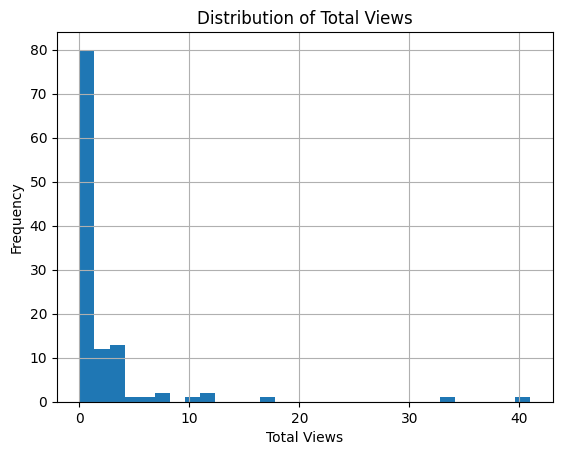

Daniil Medvedev          41
Elise Mertens            34
Tallon Griekspoor        17
Felix Auger-Aliassime    12
Qinwen Zheng             11
Jannik Sinner            10
Belinda Bencic            8
Alexander Bublik          7
Alex de Minaur            6
Emil Ruusuvuori           5
Name: total, dtype: int64
Adrian Mannarino           preferences
Alec Deckers           browsing/player
Alex de Minaur         browsing/player
Alexander Bublik       browsing/player
Alexei Popyrin             preferences
                            ...       
Yanina Wickmayer           preferences
Ysaline Bonaventure        preferences
Yue Yuan                   preferences
Zeynep Sonmez              preferences
Zizou Bergs                preferences
Length: 115, dtype: object


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with player names as indices and initial views as 0
df_zero_views = pd.DataFrame(0, index=player_names, columns=['total', 'preferences', 'browsing', 'browsing/player', 'browsing/parameter'])

# Convert view_counts dictionary into a DataFrame
df_view_counts = pd.DataFrame(view_counts).T

# Update the df_zero_views DataFrame with the actual view counts
# This will keep 0 for players not found in view_counts
df_zero_views.update(df_view_counts)

# Replace NaN values with 0
df_zero_views = df_zero_views.fillna(0)

# Now, you can use df_zero_views for your analysis
print(df_zero_views.describe().round(2))
print("\nSum of all columns:")
print(df_zero_views.sum())

# Distribution Analysis
df_zero_views['total'].hist(bins=30)
plt.title('Distribution of Total Views')
plt.xlabel('Total Views')
plt.ylabel('Frequency')
# Save the figure
plt.savefig('./plots/total_view_distribution.png')
plt.show()

# Top viewed players
print(df_zero_views['total'].nlargest(10))

# Page from which players are viewed most
print(df_zero_views.drop('total', axis=1).idxmax(axis=1))


        total  preferences  browsing  browsing/player  browsing/parameter
count  115.00       115.00    115.00           115.00              115.00
mean     1.89         0.03      0.17             1.29                0.40
std      3.56         0.21      0.90             2.82                0.83
min      0.00         0.00      0.00             0.00                0.00
25%      0.00         0.00      0.00             0.00                0.00
50%      1.00         0.00      0.00             0.00                0.00
75%      2.00         0.00      0.00             1.00                1.00
max     20.00         2.00      7.00            19.00                4.00

Sum of all columns:
total                 217
preferences             3
browsing               20
browsing/player       148
browsing/parameter     46
dtype: int64


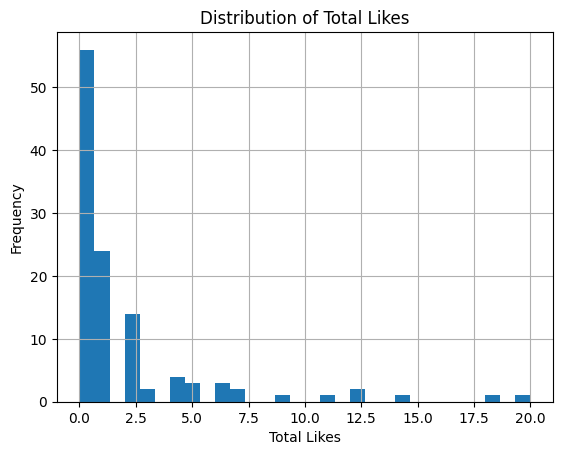

Daniil Medvedev          20
Elise Mertens            18
Felix Auger-Aliassime    14
Alex de Minaur           12
Tallon Griekspoor        12
Alexander Bublik         11
Marin Cilic               9
Veronika Kudermetova      7
Victoria Azarenka         7
Borna Coric               6
Name: total, dtype: int64
Adrian Mannarino       browsing/player
Alec Deckers               preferences
Alex de Minaur                browsing
Alexander Bublik              browsing
Alexei Popyrin         browsing/player
                            ...       
Yanina Wickmayer           preferences
Ysaline Bonaventure        preferences
Yue Yuan                   preferences
Zeynep Sonmez              preferences
Zizou Bergs                preferences
Length: 115, dtype: object


In [23]:
# Create a DataFrame with player names as indices and initial likes as 0
df_zero_likes = pd.DataFrame(0, index=player_names, columns=['total', 'preferences', 'browsing', 'browsing/player', 'browsing/parameter'])

# Convert like_counts dictionary into a DataFrame
df_like_counts = pd.DataFrame(like_counts).T

# Update the df_zero_likes DataFrame with the actual like counts
# This will keep 0 for players not found in like_counts
df_zero_likes.update(df_like_counts)

# Replace NaN values with 0
df_zero_likes = df_zero_likes.fillna(0)

# Now, you can use df_zero_likes for your analysis
print(df_zero_likes.describe().round(2))
print("\nSum of all columns:")
print(df_zero_likes.sum())

# Distribution Analysis
df_zero_likes['total'].hist(bins=30)
plt.title('Distribution of Total Likes')
plt.xlabel('Total Likes')
plt.ylabel('Frequency')
# Save the figure
plt.savefig('./plots/total_like_distribution.png')
plt.show()

# Top liked players
print(df_zero_likes['total'].nlargest(10))

# Page from which players are liked most
print(df_zero_likes.drop('total', axis=1).idxmax(axis=1))


## Get properties

In [27]:
from database_workers.Neo4j_Player_Worker import Player_Worker
# player_names = list(like_counts.keys())
# players = dict()

player_worker = Player_Worker()
# for player in player_names:
    # players[player] = player_worker.get_player_data(player)
players = player_worker.get_all_players_with_personal_data()
player_worker.close()

# Rather than a list of dictionaries, make it a dictionary of dictionaries, with the player name as the key
players = {player['name']: player for player in players}
players

{'Mackenzie McDonald': {'name': 'Mackenzie McDonald',
  'country': 'USA',
  'rank': 59,
  'rank_level': 2,
  'status': 'Qualifier',
  'experience': 2,
  'play_style': '',
  'style': None,
  'age': 28,
  'height': 178,
  'favorite_shot': 'Forehand',
  'hand': 'Right-handed',
  'personality_tags': [''],
  'personality_long': '',
  'grass_advantage': False,
  'career_high_rank': 48,
  'years_on_tour': 7,
  'coach': 'Robby Ginepri',
  'image_url': 'https://libema-open.nl/wp-content/uploads/2023/05/mcdonald_full.png',
  'gender': 'Male',
  'country_code': 'US',
  'career_high_year': 2022,
  'previous_libema_winner': False,
  'country_zone': 'North America'},
 'Corentin Moutet': {'name': 'Corentin Moutet',
  'country': 'France',
  'rank': 61,
  'rank_level': 2,
  'status': 'Qualifier',
  'experience': 2,
  'play_style': '',
  'style': None,
  'age': 24,
  'height': 175,
  'favorite_shot': 'Volley',
  'hand': 'Left-handed',
  'personality_tags': [''],
  'personality_long': '',
  'grass_advant

In [28]:
sorted(list(players['Daniil Medvedev'].keys()))

['age',
 'career_high_rank',
 'career_high_year',
 'coach',
 'country',
 'country_code',
 'country_zone',
 'experience',
 'favorite_shot',
 'gender',
 'grass_advantage',
 'hand',
 'height',
 'image_url',
 'name',
 'personality_long',
 'personality_tags',
 'play_style',
 'previous_libema_winner',
 'rank',
 'rank_level',
 'status',
 'style',
 'years_on_tour']

## Correlation analysis

In [40]:
import seaborn as sns

# Convert dictionaries to pandas DataFrames
def correlation_analysis(interactions, players, interaction_type):
    idf_numeric = pd.DataFrame(interactions).T
    pdf_numeric = pd.DataFrame(players).T

    # Drop non_numeric columns
    idf_numeric = idf_numeric.drop(['browsing'], axis=1)
    pdf_numeric = pdf_numeric[['rank', 'age', 'height', 'career_high_rank', 'career_high_year', 'years_on_tour', 'grass_advantage', 'previous_libema_winner']]
    pdf_numeric['previous_libema_winner'] = pdf_numeric['previous_libema_winner'].astype(int)

    # Replace NaN with 0
    idf_numeric = idf_numeric.fillna(0)
    pdf_numeric = pdf_numeric.fillna(0)


    # Merge the two dataframes on the index (player name)
    df = pd.merge(pdf_numeric, idf_numeric['total'], left_index=True, right_index=True)

    # Convert columns to appropriate data types
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')

    # Check for linearity
    for col in df.columns:
        if col != 'total':
            sns.lmplot(x=col, y='total', data=df, line_kws={'color': 'red'})
            plt.title(f'{col} vs. {interaction_type}')
            plt.ylabel(interaction_type)

            # save the plot in ./plots
            plt.savefig(f'./plots/{col}_vs_{interaction_type}.png')
            plt.show()

    # Calculate correlation matrix
    correlation_matrix = df.corr('kendall')

    correlation_with_total = correlation_matrix['total'][:-1]
    print(correlation_with_total)

    # Now print them in order of overall magnitude (turn them all positive), from highest to lowest, , excluding the last one (which is the total itself)
    print()
    print(correlation_matrix['total'][:-1].abs().sort_values(ascending=False))

    # Round the correlation matrix to 2 decimal places
    correlation_matrix_rounded = correlation_matrix.round(2)

    # Set the figure size
    plt.figure(figsize=(10, 10))

    # Plot the correlation matrix
    sns.heatmap(correlation_matrix_rounded, annot=True, cmap='coolwarm')
    # Save this in matrix, but prevent it from getting cut off
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title(f'Correlation Matrix for {interaction_type}')
    # This line added:
    plt.tight_layout()
    # save the plot in ./plots
    plt.savefig(f'./plots/correlation_matrix_{interaction_type}.png')
    plt.show()


    # Return the correlation with total as a DataFrame
    # Round to 3 digits after the decimal place
    correlation_with_total = correlation_with_total.round(3)
    result = pd.DataFrame(correlation_with_total).sort_values(by='total', ascending=False).rename(columns={'total': interaction_type})
    return result

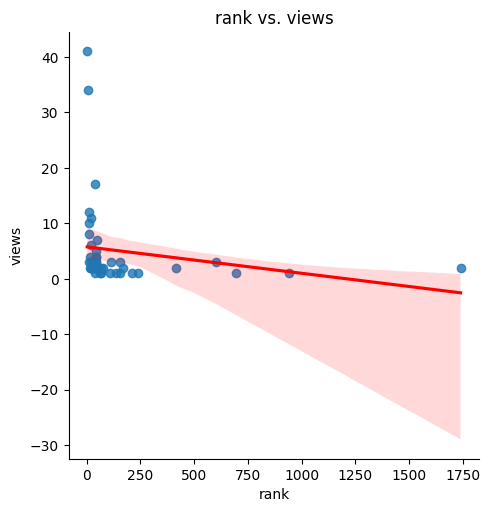

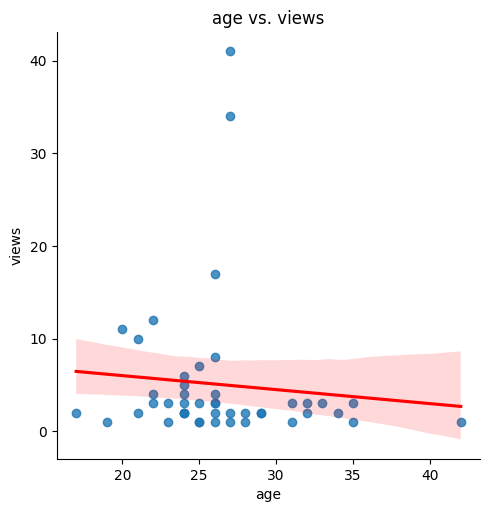

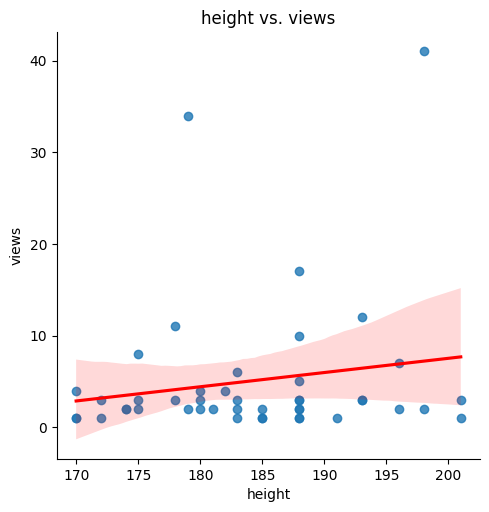

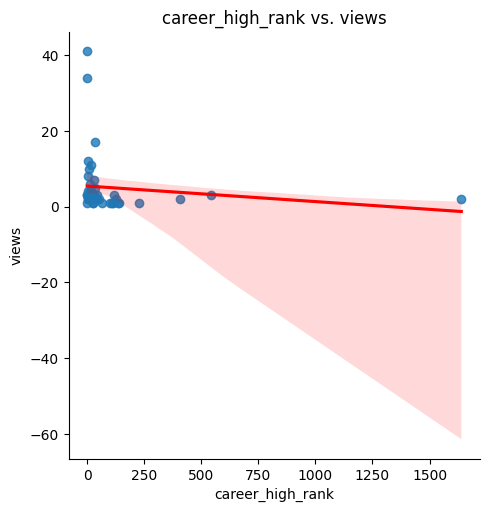

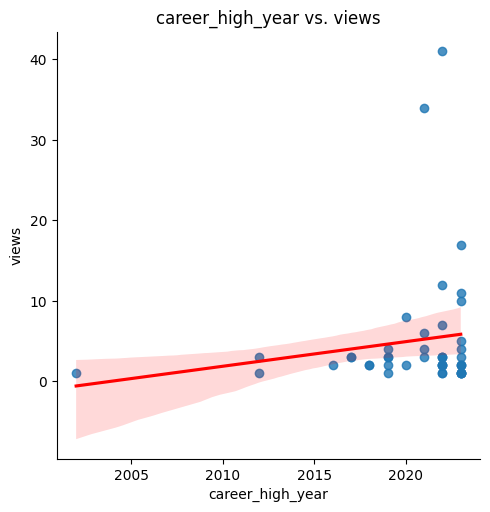

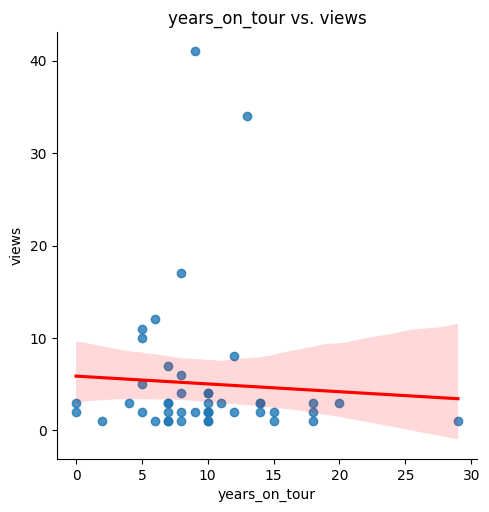

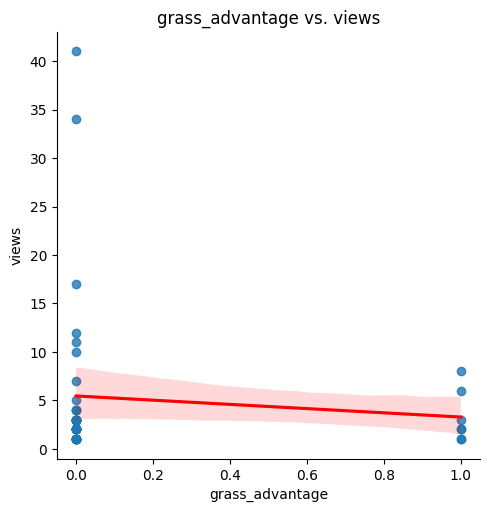

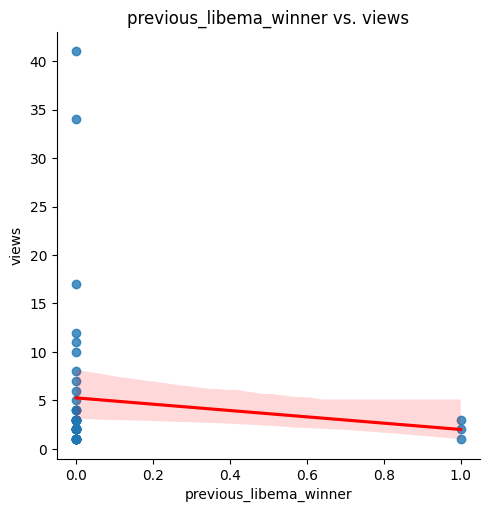

rank                     -0.487439
age                      -0.163016
height                    0.070678
career_high_rank         -0.344977
career_high_year          0.026766
years_on_tour            -0.106362
grass_advantage          -0.061590
previous_libema_winner   -0.120525
Name: total, dtype: float64

rank                      0.487439
career_high_rank          0.344977
age                       0.163016
previous_libema_winner    0.120525
years_on_tour             0.106362
height                    0.070678
grass_advantage           0.061590
career_high_year          0.026766
Name: total, dtype: float64


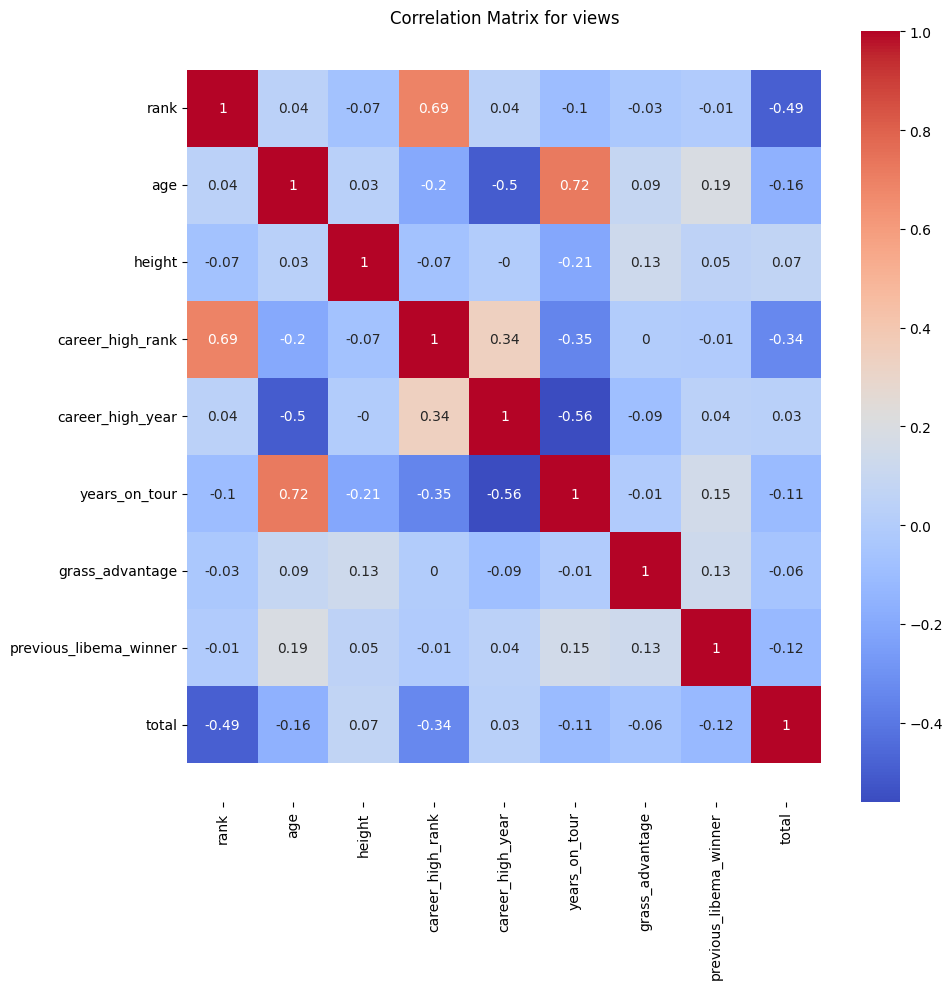

In [41]:
view_cors = correlation_analysis(view_counts, players, 'views')

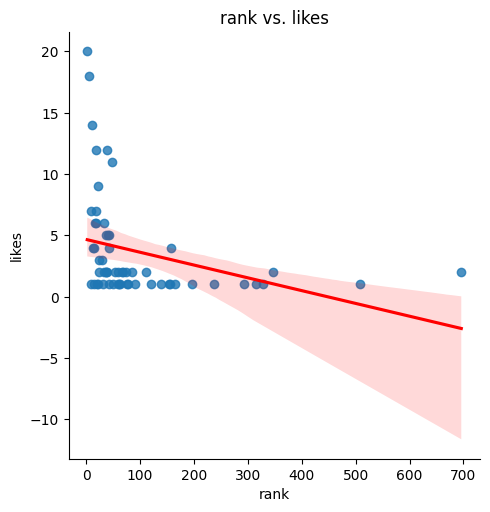

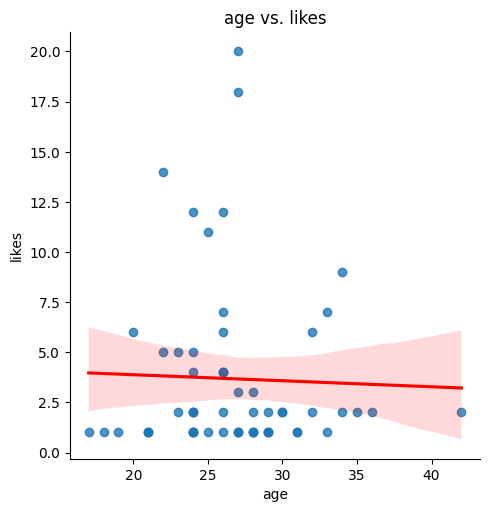

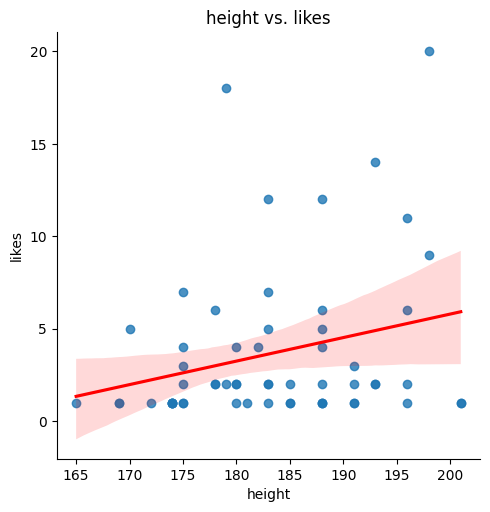

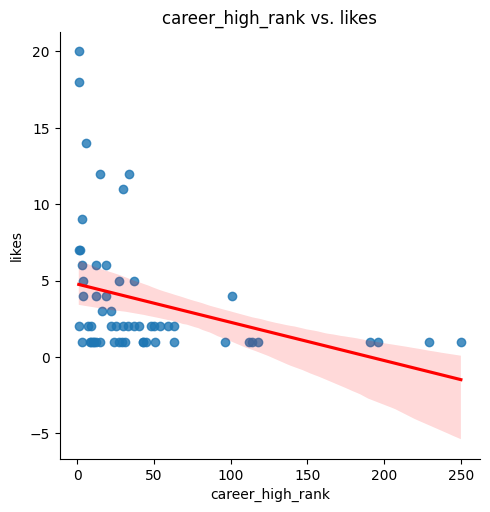

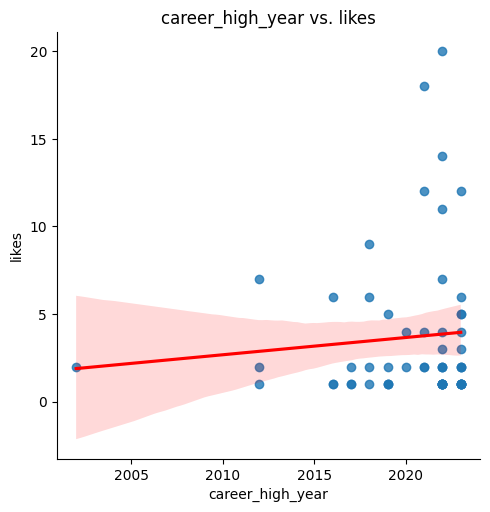

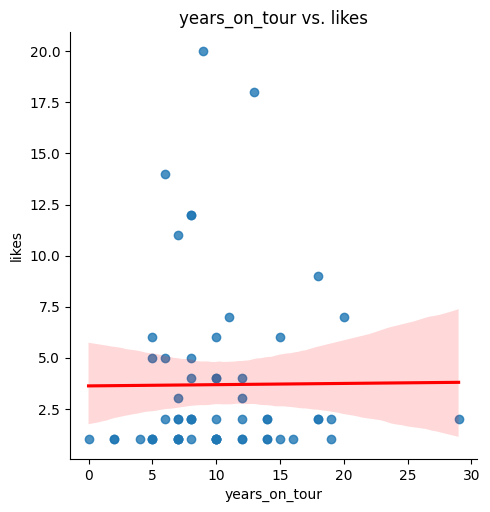

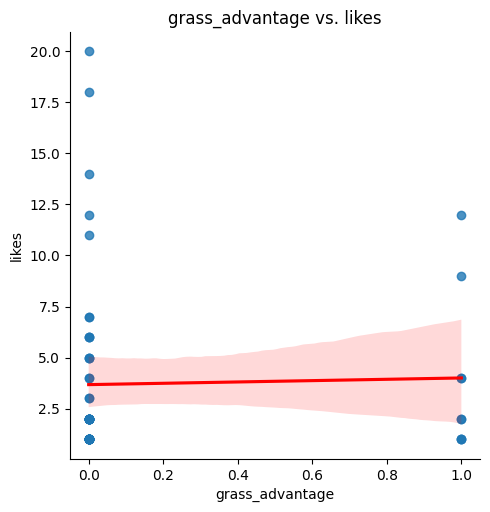

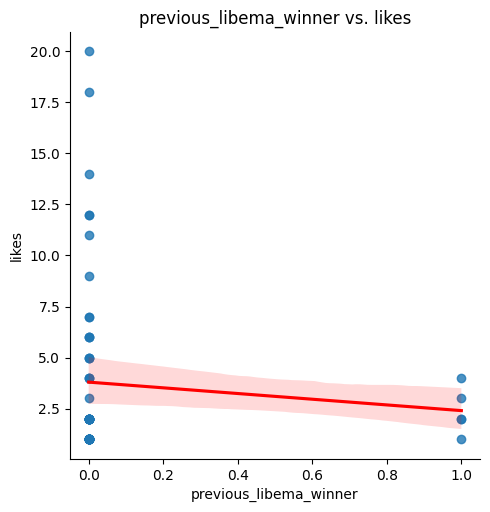

rank                     -0.450671
age                       0.016479
height                    0.194032
career_high_rank         -0.385790
career_high_year         -0.005097
years_on_tour             0.079950
grass_advantage           0.055598
previous_libema_winner    0.025041
Name: total, dtype: float64

rank                      0.450671
career_high_rank          0.385790
height                    0.194032
years_on_tour             0.079950
grass_advantage           0.055598
previous_libema_winner    0.025041
age                       0.016479
career_high_year          0.005097
Name: total, dtype: float64


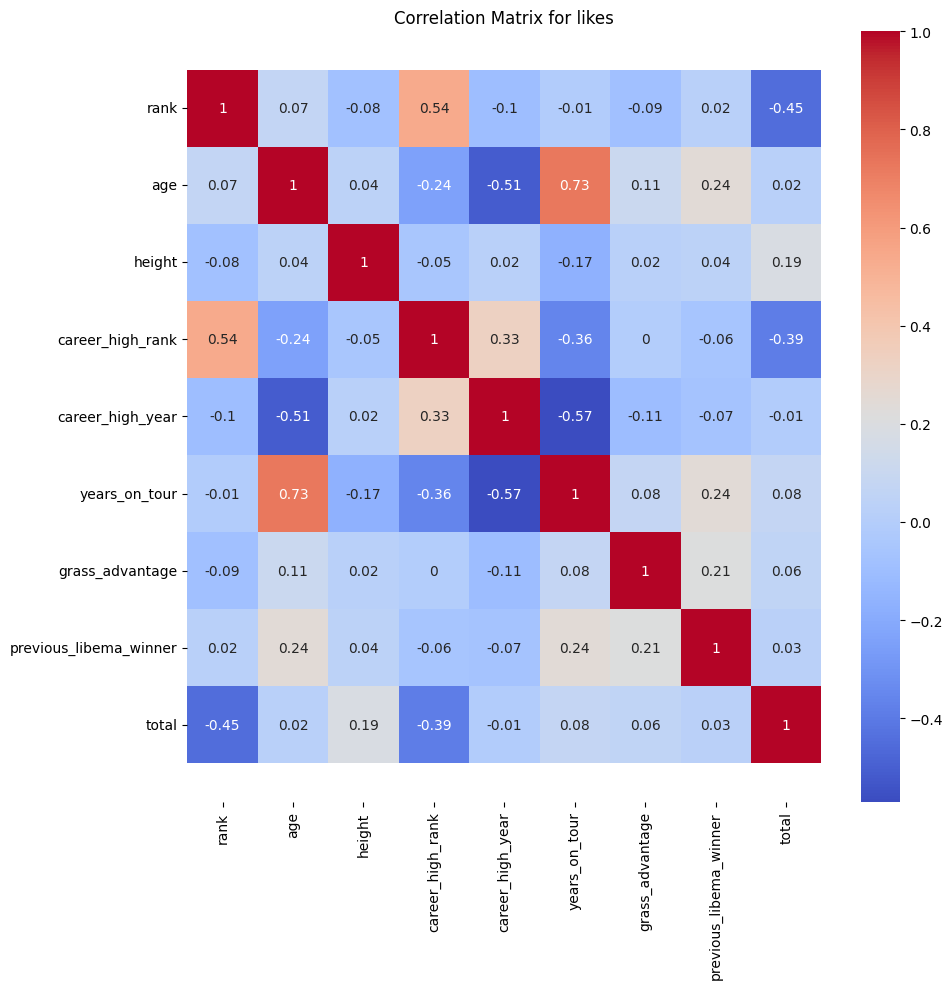

In [42]:
like_cors = correlation_analysis(like_counts, players, 'likes')

In [20]:
# Sort view cors from smallest to largest
view_cors

,views
height,0.071
career_high_year,0.027
grass_advantage,-0.062
years_on_tour,-0.106
previous_libema_winner,-0.121
age,-0.163
career_high_rank,-0.345
rank,-0.487


In [21]:
like_cors

,likes
height,0.194
years_on_tour,0.080
grass_advantage,0.056
previous_libema_winner,0.025
age,0.016
career_high_year,-0.005
career_high_rank,-0.386
rank,-0.451


In [22]:
view_cors.to_csv('./results/view_cors.csv')
like_cors.to_csv('./results/like_cors.csv')

# Categorical analyses
For categorical variables, you could perform an ANOVA or Chi-squared test to determine if the variable is associated with total views.

In [23]:
def create_cat_dataframe(view_interactions, like_interactions, players):
    # Convert dictionaries to pandas DataFrames
    view_idf = pd.DataFrame(view_interactions).T
    like_idf = pd.DataFrame(like_interactions).T
    pdf = pd.DataFrame(players).T

    # Select 'total' interactions and specific player properties
    view_idf = view_idf['total']
    like_idf = like_idf['total']
    pdf = pdf[['rank', 'age', 'height', 'career_high_rank', 'career_high_year', 'years_on_tour', 'grass_advantage', 'previous_libema_winner', 'country_zone', 'favorite_shot', 'gender', 'hand', 'play_style', 'personality_tags']]

    # Convert 'previous_libema_winner' to integer
    pdf['previous_libema_winner'] = pdf['previous_libema_winner'].astype(int)

    # Merge the view interactions dataframe with the players dataframe, fill missing interactions with 0
    df = pd.merge(pdf, view_idf, how='left', left_index=True, right_index=True).fillna(0)

    # Merge the like interactions dataframe with the current dataframe, fill missing interactions with 0
    df = pd.merge(df, like_idf, how='left', left_index=True, right_index=True, suffixes=('_views', '_likes')).fillna(0)

    # Convert columns to appropriate data types
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore', downcast='integer')

    # Sort by total_likes
    df = df.sort_values(by='total_likes', ascending=False)

    # Return the created DataFrame
    return df

In [24]:
def visualize_cat_property(df, property_name, interaction_type, types=['mean', 'sum', 'count']):
    import matplotlib.pyplot as plt
    import seaborn as sns

    valid_types = ['mean', 'sum', 'count']
    types = [t for t in types if t in valid_types]
    
    # Group data by the selected property and compute total and mean interaction counts
    grouped_data = df.groupby(property_name)[interaction_type].agg(valid_types).reset_index()

    # Create subplots for mean, sum and count
    fig, axs = plt.subplots(len(types), 1, figsize=(10, 5*len(types)))
    if len(types) == 1:
        axs = [axs]

    if 'mean' in types:
        # Bar plot for mean interaction counts
        sns.barplot(x=property_name, y='mean', data=grouped_data, ax=axs[0])
        axs[0].set_title(f'Mean {interaction_type.capitalize()} Counts by {property_name.capitalize()}')
        axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, horizontalalignment='right')

    if 'sum' in types:
        # Bar plot for total interaction counts
        sns.barplot(x=property_name, y='sum', data=grouped_data, ax=axs[1 if 'mean' in types else 0])
        axs[1 if 'mean' in types else 0].set_title(f'Total {interaction_type.capitalize()} Counts by {property_name.capitalize()}')
        axs[1 if 'mean' in types else 0].set_xticklabels(axs[1 if 'mean' in types else 0].get_xticklabels(), rotation=45, horizontalalignment='right')

    if 'count' in types:
        # Bar plot for player count in each category
        sns.barplot(x=property_name, y='count', data=grouped_data, ax=axs[2 if 'mean' in types and 'sum' in types else 1 if 'mean' in types or 'sum' in types else 0])
        axs[2 if 'mean' in types and 'sum' in types else 1 if 'mean' in types or 'sum' in types else 0].set_title(f'Player Counts by {property_name.capitalize()}')
        axs[2 if 'mean' in types and 'sum' in types else 1 if 'mean' in types or 'sum' in types else 0].set_xticklabels(axs[2 if 'mean' in types and 'sum' in types else 1 if 'mean' in types or 'sum' in types else 0].get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.tight_layout()
    plt.show()

In [25]:
cat_df = create_cat_dataframe(view_counts, like_counts, players)
cat_df.head()

,rank,age,height,career_high_rank,career_high_year,years_on_tour,grass_advantage,previous_libema_winner,country_zone,favorite_shot,gender,hand,play_style,personality_tags,total_views,total_likes
Daniil Medvedev,2,27,198,1,2022,9,0.0,0,,Return,Male,Right-handed,Counter puncher,"[funny, outspoken, analytical, unorthodox, def...",41,20
Elise Mertens,6,27,179,1,2021,13,0.0,0,Dutch,Backhand,Female,Right-handed,Counter puncher,"[ respectful, interactive, consistent, footwor...",34,18
Felix Auger-Aliassime,11,22,193,6,2022,6,0.0,0,North America,Forehand,Male,Right-handed,Aggressive baseliner,"[respectful, powerful serve, powerful forehand...",12,14
Alex de Minaur,19,24,183,15,2021,8,1.0,0,Australia,Backhand,Male,Right-handed,Counter puncher,"[energetic, fighter, runs like crazy on every ...",6,12
Tallon Griekspoor,39,26,188,34,2023,8,0.0,0,Dutch,Forehand,Male,Right-handed,Aggressive baseliner,"[outspoken, interactive, local hero, powerful ...",17,12


In [26]:
# find rows where country_zone = Asia
cat_df.shape[0]

115

In [27]:
len(players.keys())

115

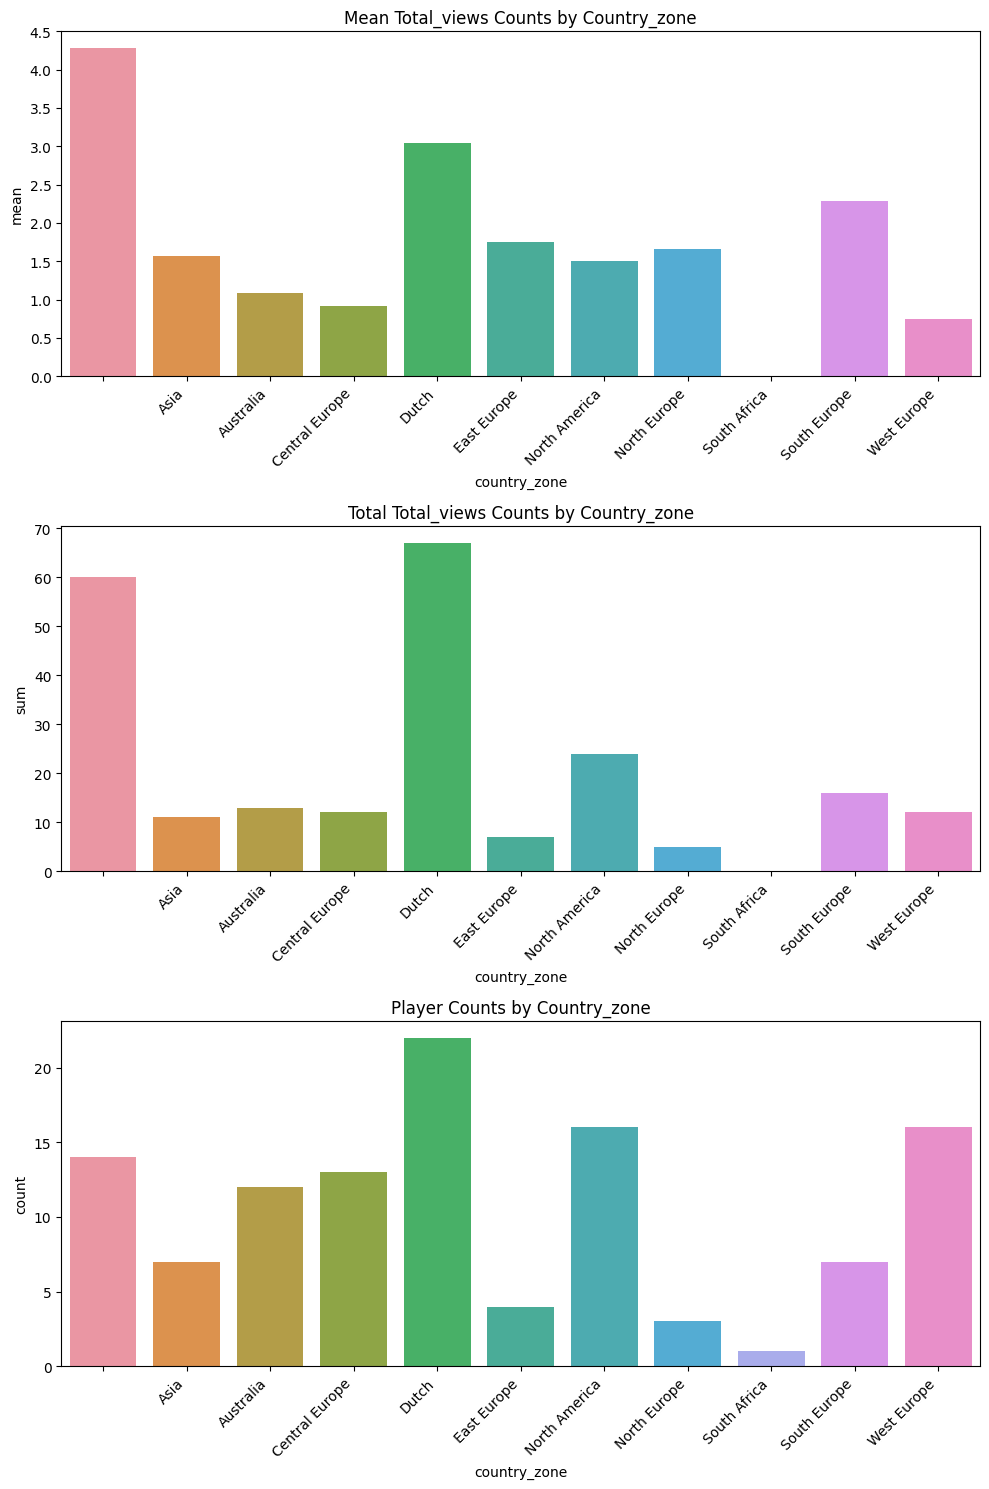

In [28]:
visualize_cat_property(cat_df, 'country_zone', 'total_views')

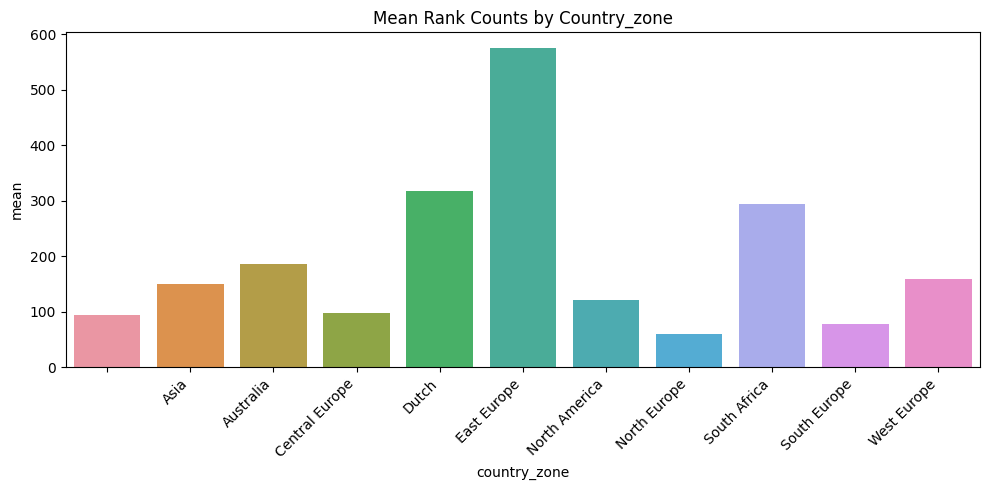

In [29]:
visualize_cat_property(cat_df, 'country_zone', 'rank', types=['mean'])

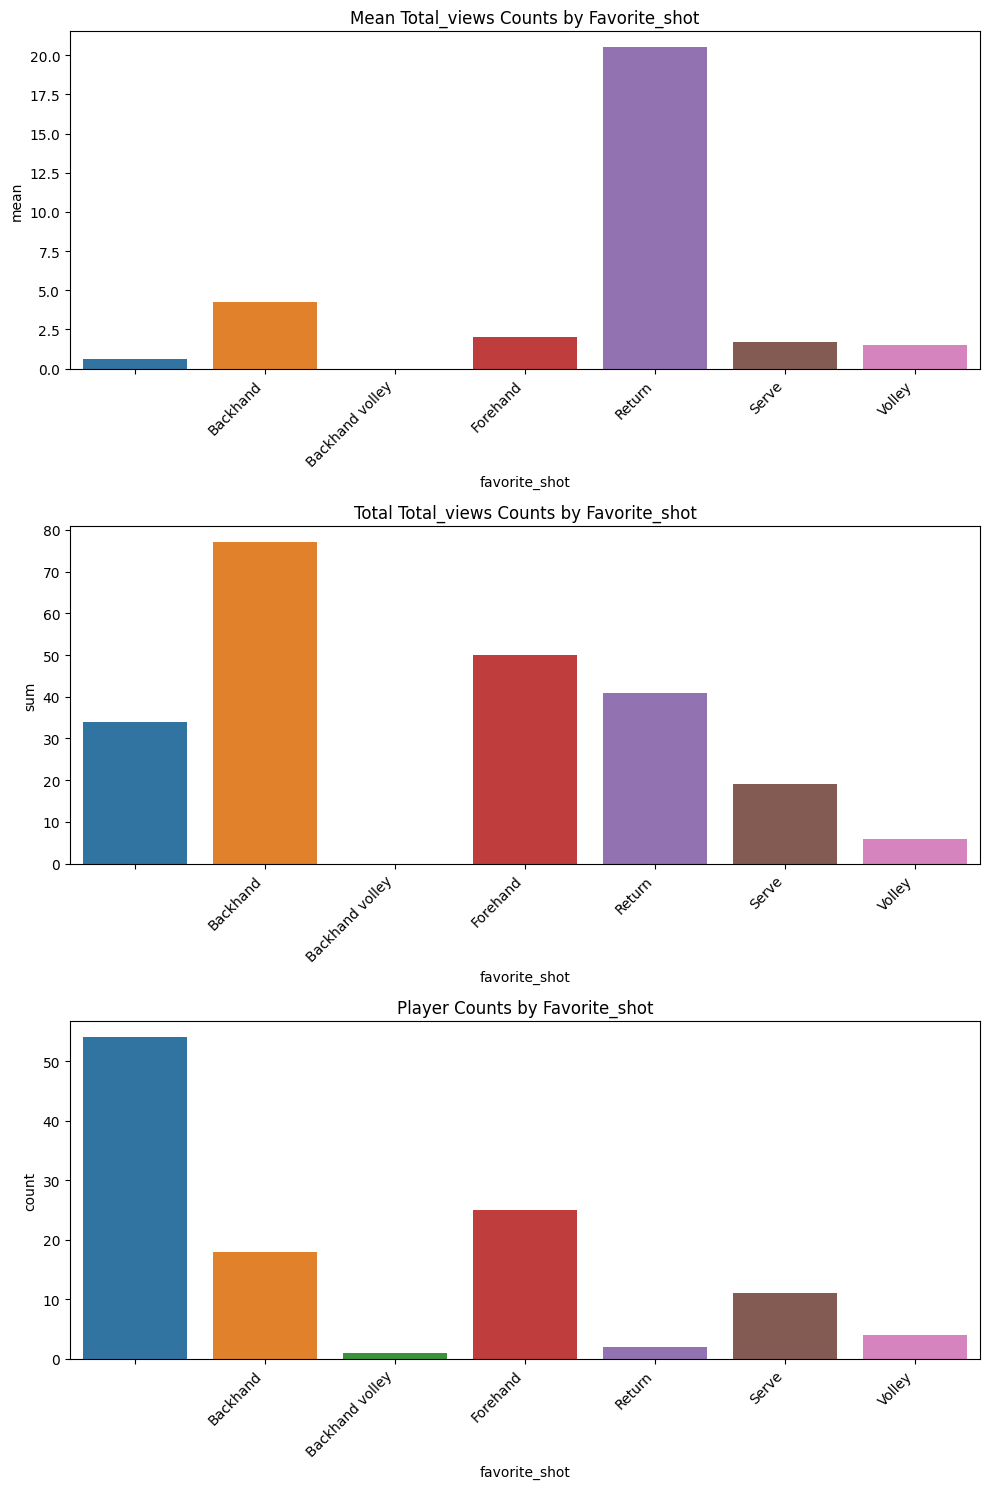

In [30]:
visualize_cat_property(cat_df, 'favorite_shot', 'total_views')

In [31]:
view_counts

{'Daniil Medvedev': {'total': 41,
  'preferences': 1,
  'browsing': 1,
  'browsing/player': 34,
  'browsing/parameter': 5},
 'Elise Mertens': {'total': 34, 'preferences': 4, 'browsing/player': 30},
 'Tallon Griekspoor': {'total': 17,
  'browsing/player': 14,
  'browsing/parameter': 3},
 'Felix Auger-Aliassime': {'total': 12, 'browsing/player': 12},
 'Qinwen Zheng': {'total': 11, 'browsing': 1, 'browsing/player': 10},
 'Jannik Sinner': {'total': 10, 'browsing/player': 10},
 'Belinda Bencic': {'total': 8, 'browsing/player': 8},
 'Alexander Bublik': {'total': 7, 'browsing/player': 7},
 'Alex de Minaur': {'total': 6, 'browsing/player': 6},
 'Emil Ruusuvuori': {'total': 5, 'browsing/player': 5},
 'Karolina Muchova': {'total': 4, 'browsing/player': 4},
 'Bianca Andreescu': {'total': 4, 'browsing/player': 4},
 'Liudmila Samsonova': {'total': 4, 'browsing/player': 4},
 'Varvara Gracheva': {'total': 3, 'browsing': 1, 'browsing/player': 2},
 'Maxime Cressy': {'total': 3, 'browsing/player': 2, 'b

In [32]:
players

{'Mackenzie McDonald': {'name': 'Mackenzie McDonald',
  'country': 'USA',
  'rank': 59,
  'rank_level': 2,
  'status': 'Qualifier',
  'experience': 2,
  'play_style': '',
  'style': None,
  'age': 28,
  'height': 178,
  'favorite_shot': 'Forehand',
  'hand': 'Right-handed',
  'personality_tags': [''],
  'personality_long': '',
  'grass_advantage': False,
  'career_high_rank': 48,
  'years_on_tour': 7,
  'coach': 'Robby Ginepri',
  'image_url': 'https://libema-open.nl/wp-content/uploads/2023/05/mcdonald_full.png',
  'gender': 'Male',
  'country_code': 'US',
  'career_high_year': 2022,
  'previous_libema_winner': False,
  'country_zone': 'North America'},
 'Corentin Moutet': {'name': 'Corentin Moutet',
  'country': 'France',
  'rank': 61,
  'rank_level': 2,
  'status': 'Qualifier',
  'experience': 2,
  'play_style': '',
  'style': None,
  'age': 24,
  'height': 175,
  'favorite_shot': 'Volley',
  'hand': 'Left-handed',
  'personality_tags': [''],
  'personality_long': '',
  'grass_advant

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by a categorical variable and compute mean view counts
grouped_data = df.groupby('country_zone')['view_count'].mean().reset_index()

# Visualize using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='country_zone', y='view_count', data=grouped_data)
plt.title('Mean View Counts by Country Zone')
plt.show()


KeyError: 'country_zone'

# Player clustering

In [ ]:
from database_workers.Neo4j_Player_Worker import Player_Worker
# player_names = list(like_counts.keys())
# players = dict()

player_worker = Player_Worker()
# for player in player_names:
    # players[player] = player_worker.get_player_data(player)
players = player_worker.get_all_players_with_personal_data()
player_worker.close()

# Rather than a list of dictionaries, make it a dictionary of dictionaries, with the player name as the key
players_dict = {player['name']: player for player in players}
players_dict

{'Mackenzie McDonald': {'name': 'Mackenzie McDonald',
  'country': 'USA',
  'rank': 59,
  'rank_level': 2,
  'status': 'Qualifier',
  'experience': 2,
  'play_style': '',
  'style': None,
  'age': 28,
  'height': 178,
  'favorite_shot': 'Forehand',
  'hand': 'Right-handed',
  'personality_tags': [''],
  'personality_long': '',
  'grass_advantage': False,
  'career_high_rank': 48,
  'years_on_tour': 7,
  'coach': 'Robby Ginepri',
  'image_url': 'https://libema-open.nl/wp-content/uploads/2023/05/mcdonald_full.png',
  'gender': 'Male',
  'country_code': 'US',
  'career_high_year': 2022,
  'previous_libema_winner': False,
  'country_zone': 'North America'},
 'Corentin Moutet': {'name': 'Corentin Moutet',
  'country': 'France',
  'rank': 61,
  'rank_level': 2,
  'status': 'Qualifier',
  'experience': 2,
  'play_style': '',
  'style': None,
  'age': 24,
  'height': 175,
  'favorite_shot': 'Volley',
  'hand': 'Left-handed',
  'personality_tags': [''],
  'personality_long': '',
  'grass_advant

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert your dictionary to a DataFrame
df_players = pd.DataFrame(players_dict).T

print(sorted(df_players.keys()))

# # Drop unnecessary columns
df_players = df_players.drop(columns=['name', 'image_url', 'country_code', 'personality_long', 'style', 'status', 'experience', 'personality_tags', 'rank_level'])

# Replace '' values with 'None' for country, play_style, favorite_shot, country_zone
df_players['country'] = df_players['country'].replace('', 'No country')
df_players['play_style'] = df_players['play_style'].replace('', 'Unknown')
df_players['favorite_shot'] = df_players['favorite_shot'].replace('', 'Unknown')
df_players['country_zone'] = df_players['country_zone'].replace('', 'Unknown')
df_players

['age', 'career_high_rank', 'career_high_year', 'coach', 'country', 'country_code', 'country_zone', 'experience', 'favorite_shot', 'gender', 'grass_advantage', 'hand', 'height', 'image_url', 'name', 'personality_long', 'personality_tags', 'play_style', 'previous_libema_winner', 'rank', 'rank_level', 'status', 'style', 'years_on_tour']


,country,rank,play_style,age,height,favorite_shot,hand,grass_advantage,career_high_rank,years_on_tour,coach,gender,career_high_year,previous_libema_winner,country_zone
Mackenzie McDonald,USA,59,None,28,178,Forehand,Right-handed,False,48,7,Robby Ginepri,Male,2022,False,North America
Corentin Moutet,France,61,None,24,175,Volley,Left-handed,True,51,7,Petar Popovic,Male,2022,False,West Europe
Max Purcell,Australia,67,None,25,185,Backhand,Right-handed,True,67,7,Dayne Kelly,Male,2023,False,Australia
Jason Kubler,Australia,69,None,30,178,Forehand,Right-handed,False,63,12,"Jarrad Bunt, Stephen Huss",Male,2023,False,Australia
Jordan Thompson,Australia,76,None,29,183,None,Right-handed,True,43,10,Peter Luczak,Male,2019,False,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Erin Routliffe,New Zealand,582,None,28,182,None,Right-handed,False,582,12,,Female,2023,False,Australia
Laslo Djere,Serbia,60,None,28,188,Forehand,Right-handed,False,27,10,Jaroslav Levinsky,Male,2019,False,Central Europe
Venus Williams,USA,696,None,42,185,None,Right-handed,False,1,29,Eric Hechtman,Female,2002,False,North America
Lucrezia Stefanini,Italy,111,None,25,164,Backhand,Right-handed,False,105,8,Ferdinando Bonuccelli,Female,2023,False,South Europe


In [ ]:
# show NaN values in each column
df_players.isnull().sum()


country                   0
rank                      0
play_style                0
age                       0
height                    0
favorite_shot             0
hand                      0
grass_advantage           0
career_high_rank          0
years_on_tour             0
coach                     0
gender                    0
career_high_year          0
previous_libema_winner    0
country_zone              0
dtype: int64

In [ ]:
cat_df

,rank,age,height,career_high_rank,career_high_year,years_on_tour,grass_advantage,previous_libema_winner,country_zone,favorite_shot,gender,hand,play_style,personality_tags,total_views,total_likes
Daniil Medvedev,2,27,198,1,2022,9,0.0,0,,Return,Male,Right-handed,Counter puncher,"[funny, outspoken, analytical, unorthodox, def...",41,20
Elise Mertens,6,27,179,1,2021,13,0.0,0,Dutch,Backhand,Female,Right-handed,Counter puncher,"[ respectful, interactive, consistent, footwor...",34,18
Felix Auger-Aliassime,11,22,193,6,2022,6,0.0,0,North America,Forehand,Male,Right-handed,Aggressive baseliner,"[respectful, powerful serve, powerful forehand...",12,14
Alex de Minaur,19,24,183,15,2021,8,1.0,0,Australia,Backhand,Male,Right-handed,Counter puncher,"[energetic, fighter, runs like crazy on every ...",6,12
Tallon Griekspoor,39,26,188,34,2023,8,0.0,0,Dutch,Forehand,Male,Right-handed,Aggressive baseliner,"[outspoken, interactive, local hero, powerful ...",17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rebecca Peterson,86,27,173,43,2019,14,0.0,0,North Europe,Forehand,Female,Right-handed,Counter puncher,"[baseline player, consistent, groundstrokes, d...",0,0
Lloyd Harris,294,26,193,31,2021,8,0.0,0,South Africa,Forehand,Male,Right-handed,,[],0,0
Pierre-Hugues Herbert,401,32,188,36,2019,13,0.0,0,West Europe,Backhand volley,Male,Right-handed,,[],0,0
Jelle Sels,169,27,188,127,2022,9,0.0,0,Dutch,,Male,Right-handed,,[],2,0


In [ ]:
# Replace '' with None in country_zone and play_style
cat_df['country_zone'] = cat_df['country_zone'].replace('', "Unknown")
cat_df['play_style'] = cat_df['play_style'].replace('', "Unknown")
cat_df.head()

,rank,age,height,career_high_rank,career_high_year,years_on_tour,grass_advantage,previous_libema_winner,country_zone,favorite_shot,gender,hand,play_style,personality_tags,total_views,total_likes
Daniil Medvedev,2,27,198,1,2022,9,0.0,0,None,Return,Male,Right-handed,Counter puncher,"[funny, outspoken, analytical, unorthodox, def...",41,20
Elise Mertens,6,27,179,1,2021,13,0.0,0,Dutch,Backhand,Female,Right-handed,Counter puncher,"[ respectful, interactive, consistent, footwor...",34,18
Felix Auger-Aliassime,11,22,193,6,2022,6,0.0,0,North America,Forehand,Male,Right-handed,Aggressive baseliner,"[respectful, powerful serve, powerful forehand...",12,14
Alex de Minaur,19,24,183,15,2021,8,1.0,0,Australia,Backhand,Male,Right-handed,Counter puncher,"[energetic, fighter, runs like crazy on every ...",6,12
Tallon Griekspoor,39,26,188,34,2023,8,0.0,0,Dutch,Forehand,Male,Right-handed,Aggressive baseliner,"[outspoken, interactive, local hero, powerful ...",17,12


In [35]:
import statsmodels.api as sm
import pandas as pd

cat_df = cat_df.dropna()

# Let's say 'country_zone' and 'play_style' are your categorical predictors
# We create dummy variables for each level of the categorical variables
cat_df = pd.get_dummies(cat_df, columns=['country_zone', 'play_style'], drop_first=True)

# Separate your predictors (X) and output (y)
X = cat_df.drop(columns=['total_likes', 'total_views'])
y = cat_df['total_likes']  # or 'view_count' depending on what you're predicting

# Add a constant to the predictors matrix (this is needed for statsmodels)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())


KeyError: "None of [Index(['country_zone', 'play_style'], dtype='object')] are in the [columns]"

In [ ]:
# show NaN in df_players
df_players['play_style'].unique()

array([0, 2, 3, 1, 4])